# predicition Logistic Regression

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [19]:
dataset=pd.read_csv("E:/heart_failure_clinical_records_dataset.csv")
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [20]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [21]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [22]:
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [24]:
dataset=pd.read_csv("E:/heart_failure_clinical_records_dataset.csv")
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values


In [25]:
#SPLITTING THE DATASET INTO THE TRAINING SET AND TEST SET OF LOGISTIC REGRESSION

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [26]:
#FEATURE SCALING

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [27]:
#FITTING LOGISTIC REGRESSION TO THE TRAINING SET
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [28]:
#Prediciting the Test set results
y_pred=classifier.predict(x_test)
df=pd.DataFrame({'Actual':y_test,"Predict":y_pred})
print(df)

    Actual  Predict
0       40       35
1       40       38
2       30       35
3       35       38
4       30       35
..     ...      ...
70      35       60
71      25       60
72      38       35
73      45       38
74      25       35

[75 rows x 2 columns]


In [29]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 1 0 0 0 3 0 0 0 0]
 [0 0 0 0 7 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 6 0 0 0 3 0 0 0 0]
 [0 0 0 0 4 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 4 0 0 0 2 0 0 0 0]
 [0 0 0 0 4 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

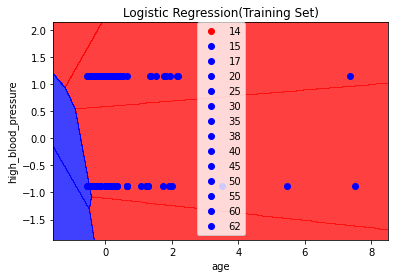

In [30]:
#Visualising the Training set results

from matplotlib.colors import ListedColormap
x_set, y_set= x_train, y_train
x1,x2 = np.meshgrid(np.arange(start =x_set[:, 0].min() -1, stop=x_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =x_set[:, 1].min() -1, stop=x_set[:, 1].max()+1, step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha=0.75, 
             cmap = ListedColormap(('red','blue')))
plt.xlim((x1.min(),x1.max()))
plt.ylim((x2.min(),x2.max()))
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1], c= ListedColormap(('red','blue'))(i) ,label= j)
plt.title('Logistic Regression(Training Set)')
plt.xlabel('age')
plt.ylabel('high_blood_pressure')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

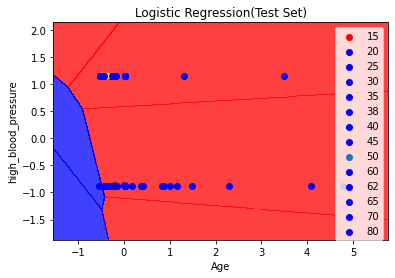

In [31]:
#VISUALISING THE TEST SET OF LOGISITIC REGRESSION
from matplotlib.colors import ListedColormap
x_set, y_set= x_test, y_test
x1,x2 = np.meshgrid(np.arange(start =x_set[:, 0].min() -1, stop=x_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =x_set[:, 1].min() -1, stop=x_set[:, 1].max()+1, step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha=0.75, 
             cmap = ListedColormap(('red','blue')))
plt.xlim((x1.min(),x1.max()))
plt.ylim((x2.min(),x2.max()))
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1], c= ListedColormap(('red','blue'))(i) ,label= j) 
plt.title('Logistic Regression(Test Set)')
plt.xlabel('Age')
plt.ylabel('high_blood_pressure')
plt.legend()
plt.show()

In [14]:
x = dataset.iloc[:, 1:3].values
print ("\nOriginal data values : \n",  x)
  


Original data values : 
 [[   0  582]
 [   0 7861]
 [   0  146]
 [   1  111]
 [   1  160]
 [   1   47]
 [   1  246]
 [   1  315]
 [   0  157]
 [   1  123]
 [   1   81]
 [   0  231]
 [   1  981]
 [   1  168]
 [   1   80]
 [   1  379]
 [   1  149]
 [   0  582]
 [   1  125]
 [   1  582]
 [   1   52]
 [   1  128]
 [   1  220]
 [   0   63]
 [   0  582]
 [   0  148]
 [   1  112]
 [   0  122]
 [   1   60]
 [   0   70]
 [   0  582]
 [   0   23]
 [   1  249]
 [   1  159]
 [   0   94]
 [   0  582]
 [   1   60]
 [   1  855]
 [   0 2656]
 [   0  235]
 [   0  582]
 [   0  124]
 [   0  571]
 [   0  127]
 [   1  588]
 [   0  582]
 [   0 1380]
 [   0  582]
 [   1  553]
 [   1  129]
 [   1  577]
 [   1   91]
 [   0 3964]
 [   1   69]
 [   1  260]
 [   1  371]
 [   1   75]
 [   1  607]
 [   0  789]
 [   0  364]
 [   0 7702]
 [   0  318]
 [   0  109]
 [   0  582]
 [   0  582]
 [   0   68]
 [   1  250]
 [   1  110]
 [   0  161]
 [   0  113]
 [   0  148]
 [   0  582]
 [   0 5882]
 [   0  224]
 [   0  582]

In [15]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = min_max_scaler.fit_transform(x)
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)
Standardisation = preprocessing.StandardScaler()
x_after_Standardisation = Standardisation.fit_transform(x)
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After min max Scaling : 
 [[0.00000000e+00 7.13192141e-02]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.56927788e-02]
 [1.00000000e+00 1.12273539e-02]
 [1.00000000e+00 1.74789487e-02]
 [1.00000000e+00 3.06200561e-03]
 [1.00000000e+00 2.84511355e-02]
 [1.00000000e+00 3.72544016e-02]
 [0.00000000e+00 1.70961980e-02]
 [1.00000000e+00 1.27583567e-02]
 [1.00000000e+00 7.39984690e-03]
 [0.00000000e+00 2.65373820e-02]
 [1.00000000e+00 1.22225057e-01]
 [1.00000000e+00 1.84996172e-02]
 [1.00000000e+00 7.27226333e-03]
 [1.00000000e+00 4.54197499e-02]
 [1.00000000e+00 1.60755295e-02]
 [0.00000000e+00 7.13192141e-02]
 [1.00000000e+00 1.30135239e-02]
 [1.00000000e+00 7.13192141e-02]
 [1.00000000e+00 3.69992345e-03]
 [1.00000000e+00 1.33962746e-02]
 [1.00000000e+00 2.51339627e-02]
 [0.00000000e+00 5.10334269e-03]
 [0.00000000e+00 7.13192141e-02]
 [0.00000000e+00 1.59479459e-02]
 [1.00000000e+00 1.13549375e-02]
 [0.00000000e+00 1.26307732e-02]
 [1.00000000e+00 4.72059199e-03]
 [0.00000000e+00